# * Insurance Claims- Fraud Detection

# Problem Statement:

# Business case:
# Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

# In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

# In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\New folder\Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
#Lets check the shape of dataset
df.shape

(1000, 40)

So , here we have 1000 rows and 40 columns

# Data is Duplicated ?

In [5]:
df.duplicated().sum()

0

so, here we have 0 Duplicated Data

In [6]:
#Lets check the data type of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Missing Values

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.drop('_c39',axis=1,inplace=True)

<AxesSubplot:>

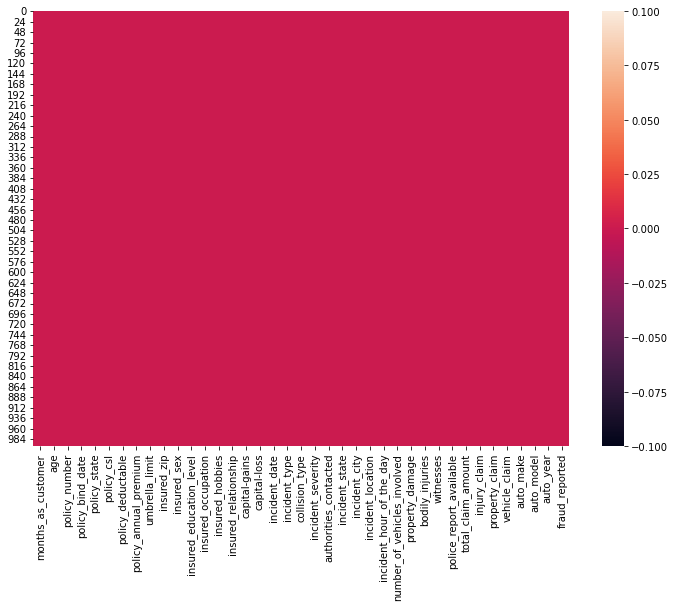

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Exploratory Data Analysis: Univarient

In [12]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']


print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 21
Number of Continuous features: 18


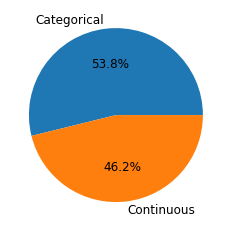

In [13]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')
plt.show()

In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Value count Function

In [15]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [16]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

# essential function

In [17]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [18]:
# countplot figure
def fig_countplot(df, col, sort):
    fig = plt.figure(figsize=(7, 4))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(col, fontsize=20)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    plt.show()

In [19]:
# kdeplot figure
def fig_kdeplot(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=10, density=False, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=2)
    ax.set_title(col, fontsize=20)
    plt.show()

In [20]:
# kdeplot figure yn
def fig_kdeplot_yn(df, col):
    fig = plt.figure(figsize=(9, 5))
    fig.set_facecolor('white')

    ax = sns.kdeplot(data=df, x=(df[col][df['fraud_reported'] == 'N']), shade=True, alpha=0.2, linewidth=2, color='red')
    ax = sns.kdeplot(data=df, x=(df[col][df['fraud_reported'] == 'Y']), shade=True, alpha=0.2, linewidth=2, color='blue')
    
    ax.set_title(col, fontsize=20)
    ax.legend(['fraud_reported', 'Not fraud_reported'], loc='upper right')
    plt.show()

In [21]:
def fig_countplot_yn(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = sns.countplot(data=df, x=col, hue='fraud_reported', palette='flare')
    
    # percentage
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    plt.show()

In [22]:
# boxplot figure
def fig_boxplot(df,col):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(df[col])
    ax.set_title(col, fontsize=20)
    plt.show()

In [23]:
# print percentage of categorical data
def print_percentage(df, col):
    print(df[col].value_counts()/df[col].count()*100)

In [24]:
# print percentage of churn vs not churn 
def print_percentage_yn(df, col):
    print("fraud_reported: ")
    print((df[col][df['fraud_reported'] == 'Yes'].value_counts()/df[col].count())*100)
    print("Not fraud_reported: ")
    print((df[col][df['fraud_reported'] == 'No'].value_counts()/df[col].count())*100)

In [25]:
# pie chart
def fig_piechart(df, col):
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    ax = (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
    ax.set_title(col)
    plt.show()

In [26]:
def fig_sub_pie(df, col):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(9, 5))
    fig.set_facecolor('white')

    # pieplot
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors, ax=ax[0])
    
    # countplot
    sns.countplot(data=df, x=col, hue='fraud_reported', palette='flare', ax=ax[1])
    # percentage on countplot
    bars = ax[1].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax[1].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax[1].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    
    plt.tight_layout()
    plt.show()

In [27]:
def fig_sub_count(df, col):
# for col in demographic:
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    fig.set_facecolor('white')
    
    sns.countplot(data=df, x=col, palette='Accent', ax=ax[0])
    sns.countplot(data=df, x=col, hue='fraud_reported', palette='flare', ax=ax[1])
    
    # percentage
    for i in range(2):
        bars = ax[i].patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax[i].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
            ax[i].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")
    
    plt.show()
    # print_percentage(df, col)
    # print_percentage_yn(df, col)

In [28]:
def fig_scatterplot(df, col1, col2):
    colors = np.random.rand(len(df[col1]))
    fig = df[[col1, col2]].plot.scatter(x=col1, y=col2, c='purple', alpha=0.3)
    fig.set_facecolor('white')
    plt.show()

# Analysis on fraud_reported (target)

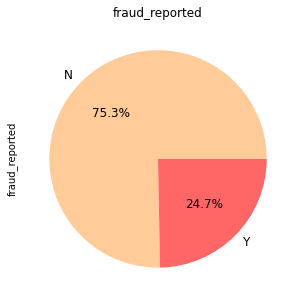

In [29]:
fig_piechart(df, 'fraud_reported')

75.3 Insurance not reporeted. The dataset is skewed, but its normal since on a business, we expect there's more Insurance who stayed. However, this skewness can lead to false negatives. we will be handling this skewness in preprocessing step after we do EDA on other features.

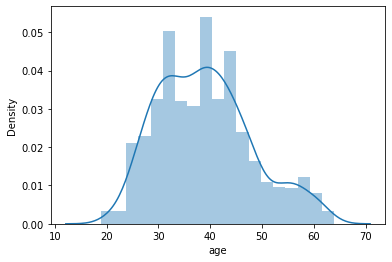

In [30]:
sns.distplot(df['age'])
plt.show()

# To make it simpler, I divided the feature to category as:

In [31]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [32]:
policy = ['policy_number', 'policy_bind_date', 'policy_state','policy_csl','policy_deductable','policy_annual_premium','police_report_available']
Insured = ['insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship']
capital = ['capitalgains-','capital-loss']
Incident = ['incident_date','incident_type','collision_type','incident_severity','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses']
claim = ['total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year']

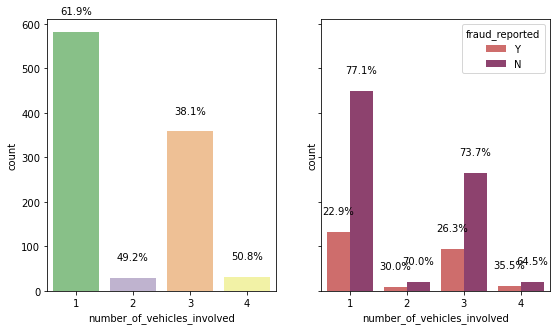

In [33]:
fig_sub_count(df, 'number_of_vehicles_involved')

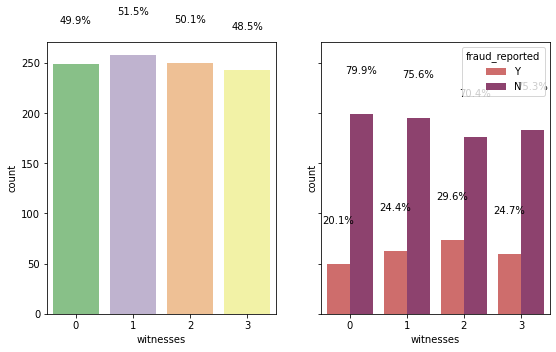

In [34]:
fig_sub_count(df, 'witnesses')

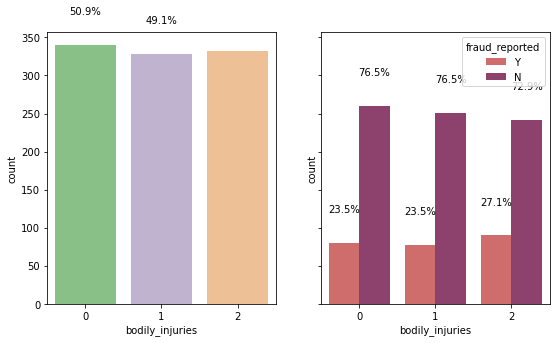

In [35]:
fig_sub_count(df, 'bodily_injuries')

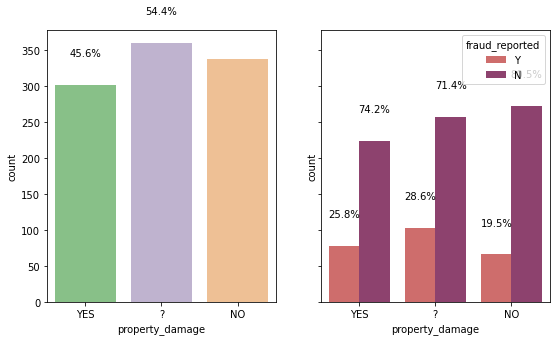

In [36]:
fig_sub_count(df, 'property_damage')

# incident_type vs fraud

In [37]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

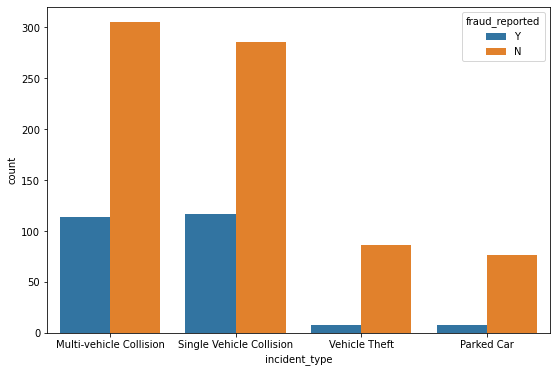

In [38]:
plt.figure(figsize=(9,6))
sns.countplot(df['incident_type'], order=df['incident_type'].value_counts().index,hue=df['fraud_reported'])

Text(0, 0.5, 'Percentage ')

<Figure size 720x432 with 0 Axes>

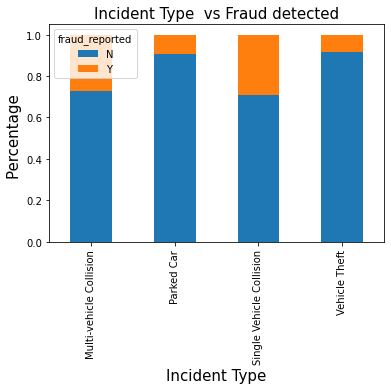

In [39]:
plt.figure(figsize=(10,6))
table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Incident Type  vs Fraud detected",fontsize=15)
plt.xlabel('Incident Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

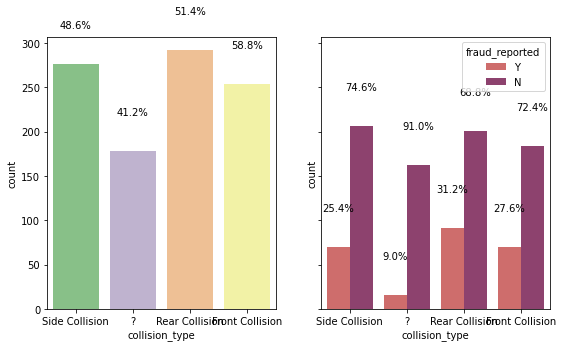

In [40]:
fig_sub_count(df, 'collision_type')

In [41]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

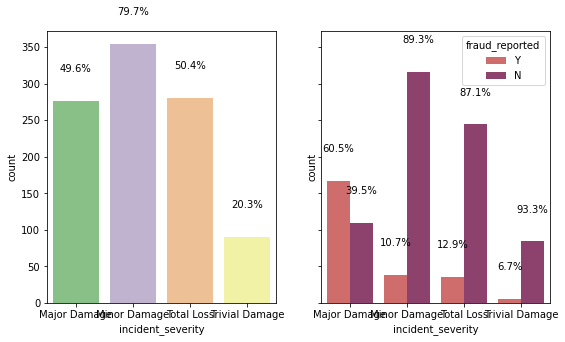

In [42]:
fig_sub_count(df, 'incident_severity')

In [43]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

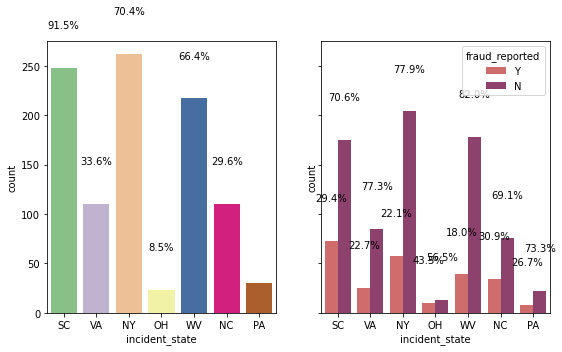

In [44]:
fig_sub_count(df, 'incident_state')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

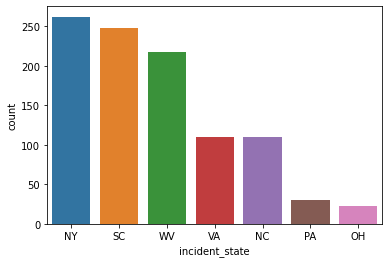

In [45]:
sns.countplot(df['incident_state'],order=df['incident_state'].value_counts().index)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

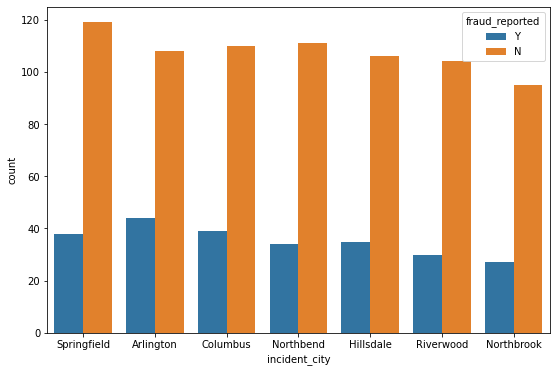

In [46]:
plt.figure(figsize=(9,6))
sns.countplot(df['incident_city'], order=df['incident_city'].value_counts().index,hue=df['fraud_reported'])

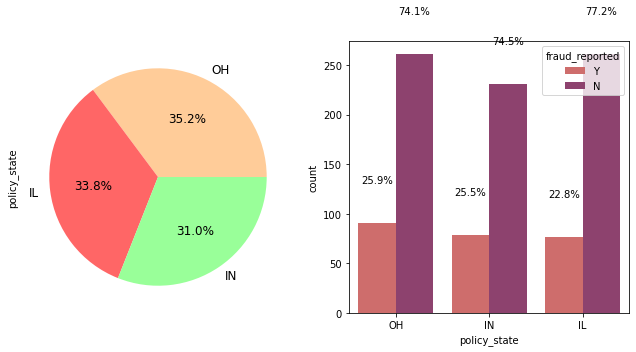

In [47]:
fig_sub_pie(df, 'policy_state')

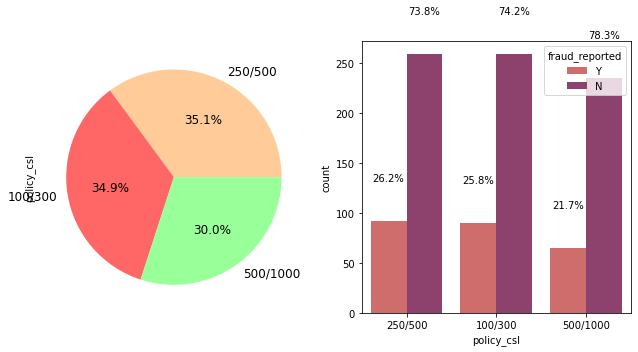

In [48]:
fig_sub_pie(df, 'policy_csl')

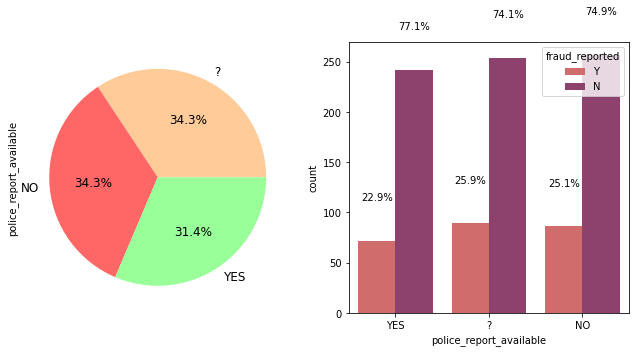

In [49]:
fig_sub_pie(df, 'police_report_available')

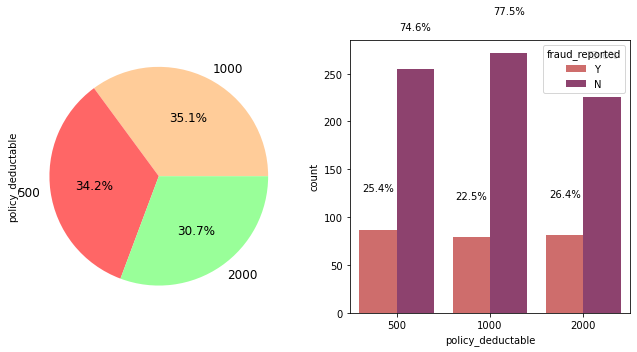

In [50]:
fig_sub_pie(df, 'policy_deductable')

In [51]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

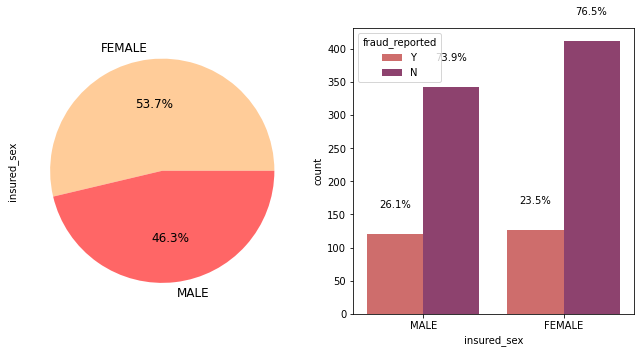

In [52]:
fig_sub_pie(df, 'insured_sex')

In [53]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

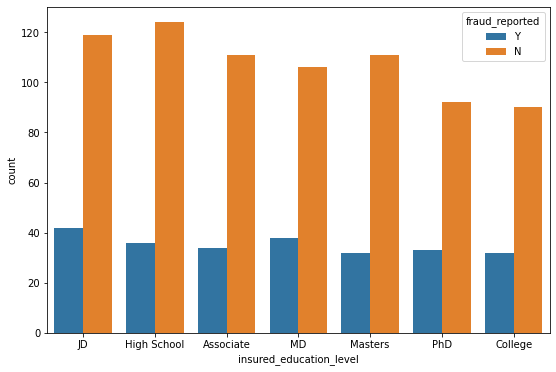

In [54]:
plt.figure(figsize=(9,6))
sns.countplot(df['insured_education_level'], order=df['insured_education_level'].value_counts().index,hue=df['fraud_reported'])

In [55]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

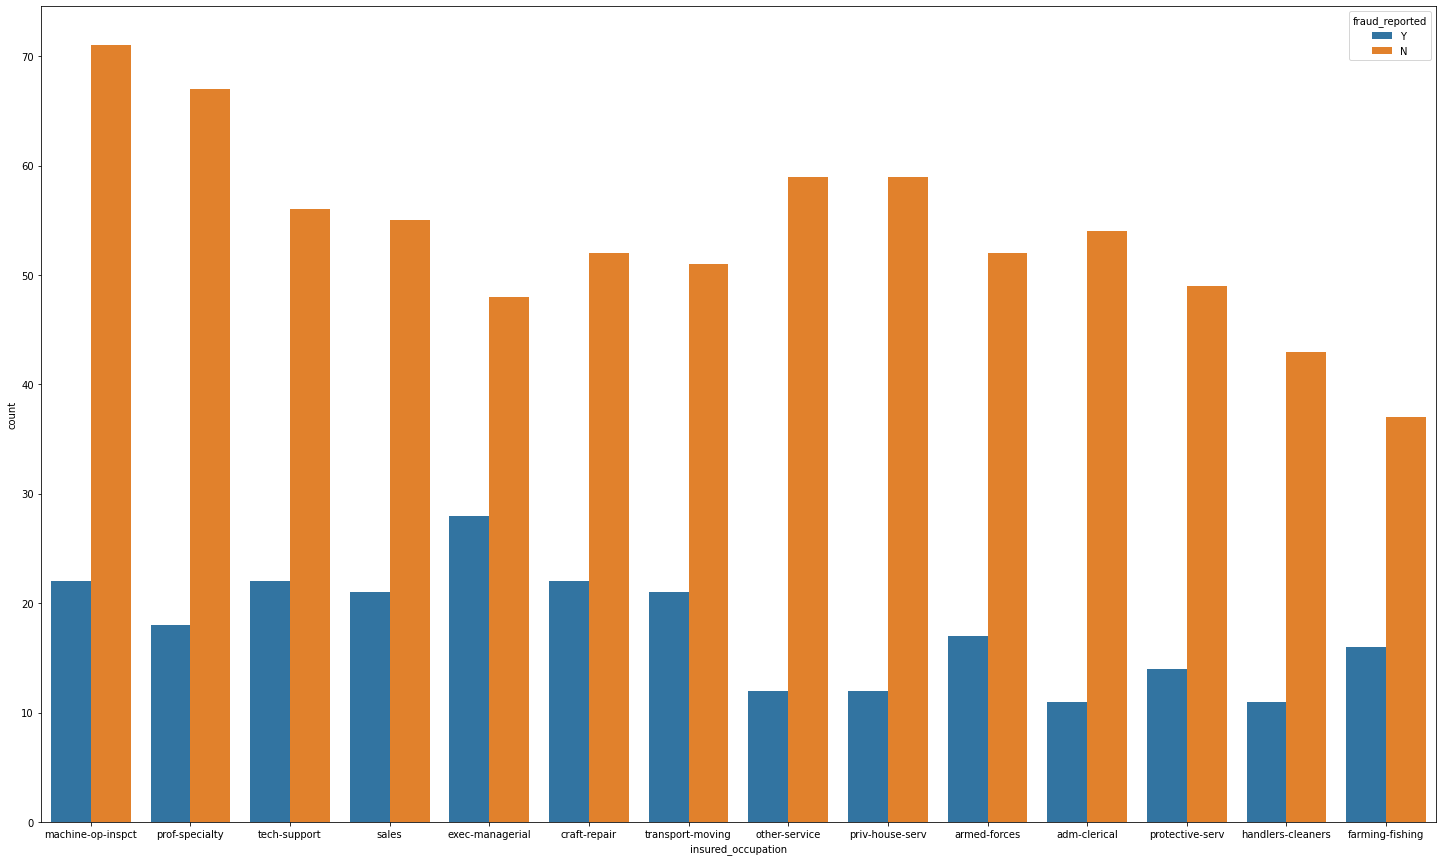

In [56]:
plt.figure(figsize=(25,15))
sns.countplot(df['insured_occupation'], order=df['insured_occupation'].value_counts().index,hue=df['fraud_reported'])

In [57]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

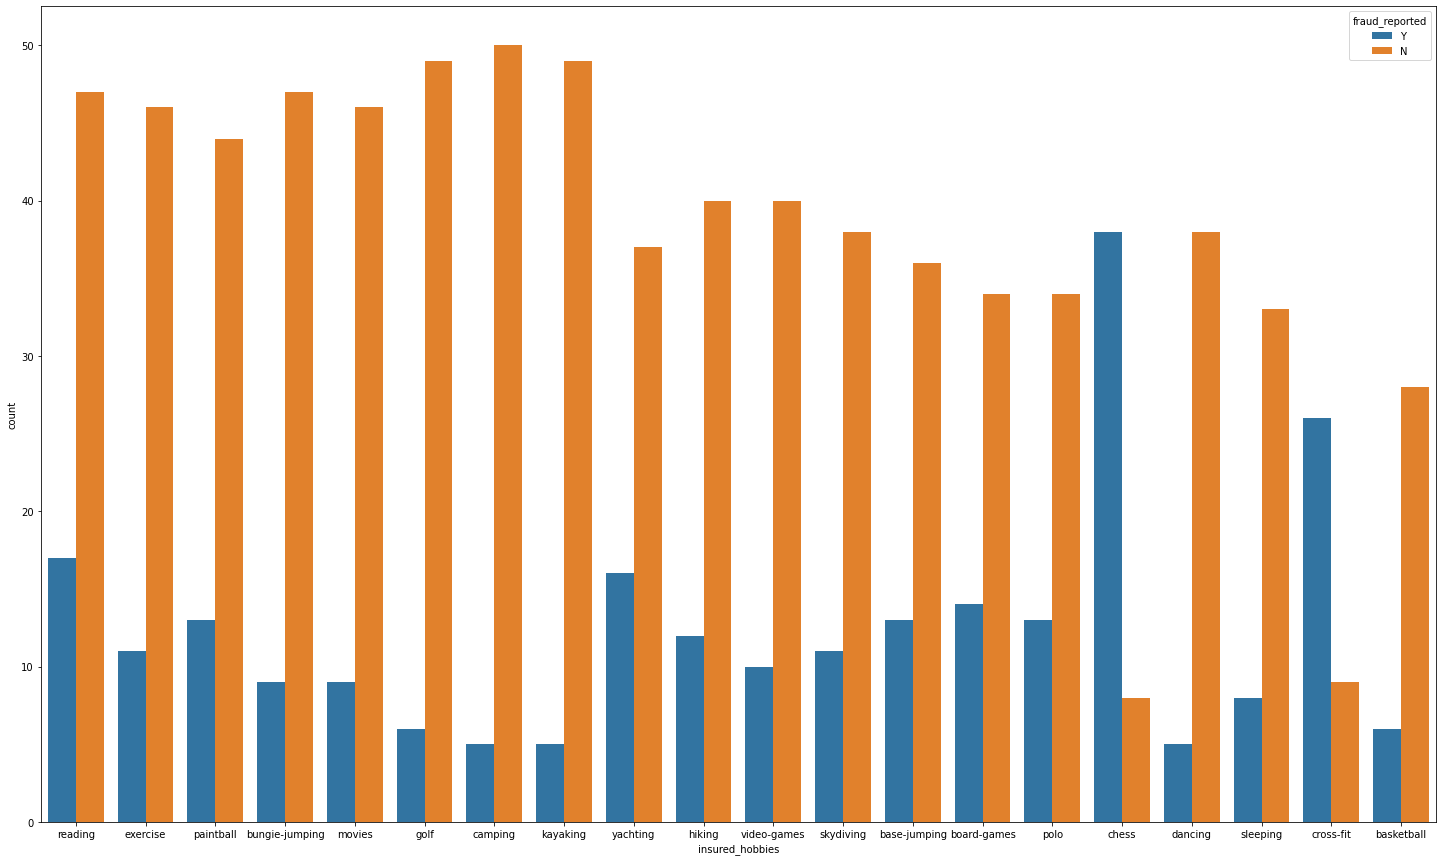

In [58]:
plt.figure(figsize=(25,15))
sns.countplot(df['insured_hobbies'], order=df['insured_hobbies'].value_counts().index,hue=df['fraud_reported'])

In [59]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

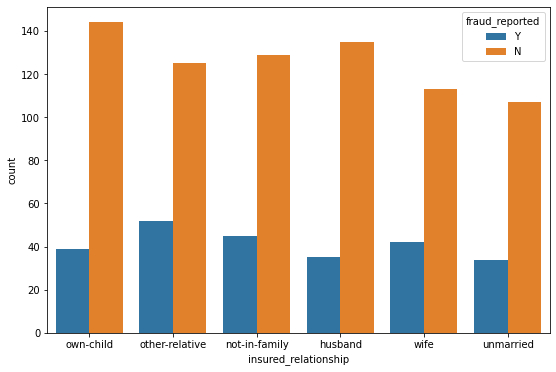

In [60]:
plt.figure(figsize=(9,6))
sns.countplot(df['insured_relationship'], order=df['insured_relationship'].value_counts().index,hue=df['fraud_reported'])

Text(0.5, 0, 'capital-loss')

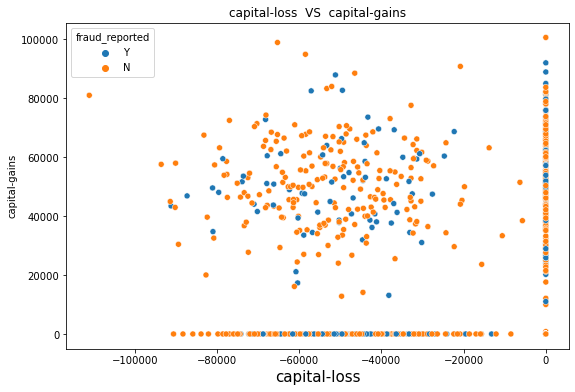

In [61]:
plt.figure(figsize=(9,6))
sns.scatterplot('capital-loss','capital-gains',hue='fraud_reported',data=df)
plt.title('capital-loss  VS  capital-gains')
plt.xlabel('capital-loss',fontsize=15)

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

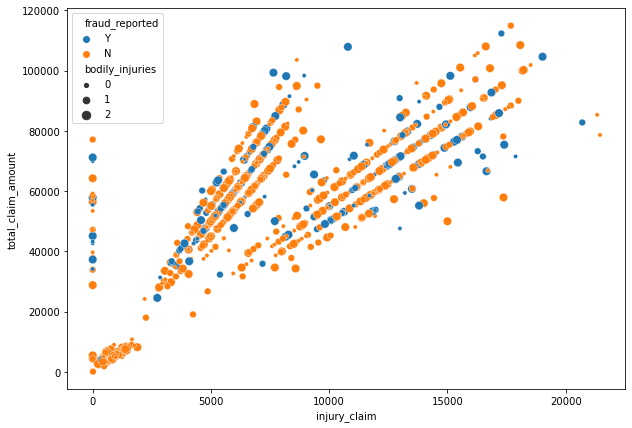

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot('injury_claim','total_claim_amount',hue='fraud_reported',size='bodily_injuries',data=df)

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

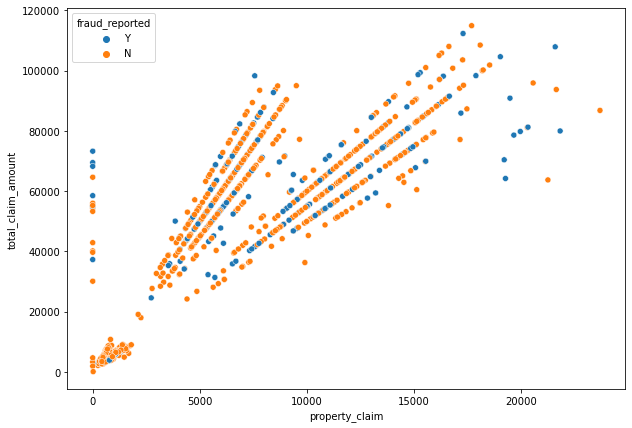

In [63]:
plt.figure(figsize=(10,7))
sns.scatterplot('property_claim','total_claim_amount',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

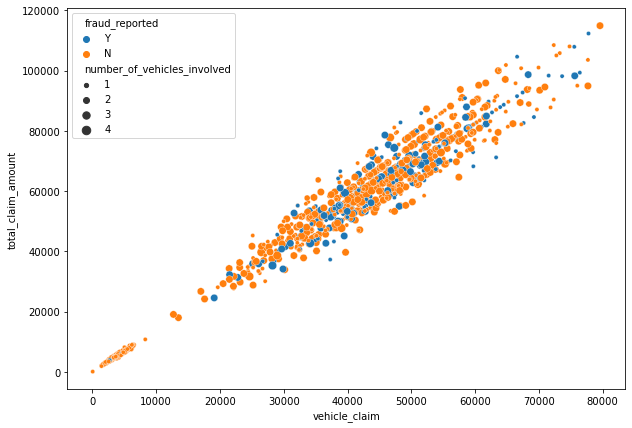

In [64]:
plt.figure(figsize=(10,7))
sns.scatterplot('vehicle_claim','total_claim_amount',hue='fraud_reported',size='number_of_vehicles_involved',data=df)

In [65]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# CHECKING FOR OUTLIERS

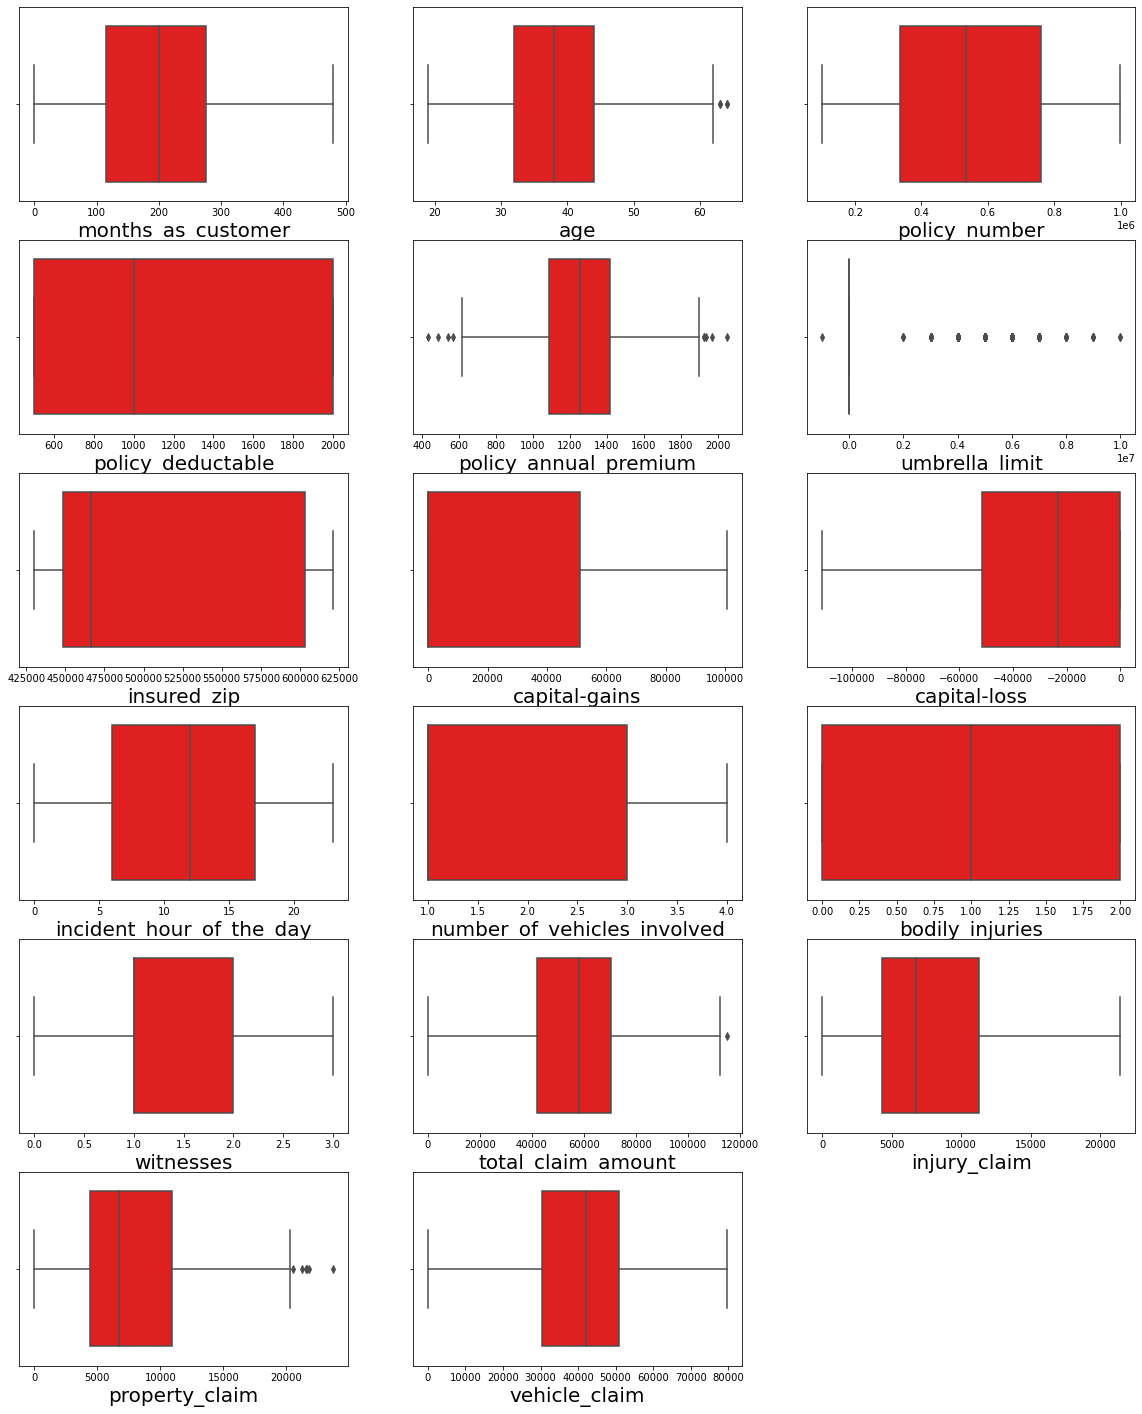

In [66]:
numerical_col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


# Removing Outliers:

# Zscore method:

In [67]:
from scipy.stats import zscore
z_score=zscore(df[['age','policy_annual_premium','property_claim','total_claim_amount']])
abs_z_score=np.abs(z_score)

In [68]:
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,996.000000,996.000000,996.000000,996.000000,996.000000,9.960000e+02,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,204.449799,38.980924,546514.416667,1137.550201,1257.616446,1.105422e+06,500954.633534,25127.409639,-26772.188755,11.664659,1.840361,0.993976,1.481928,52735.100402,7427.680723,7385.702811,37921.716867,2005.096386
std,115.023399,9.140700,256858.784341,612.397564,240.385312,2.300957e+06,71577.584889,27903.294266,28084.155651,6.949494,1.019221,0.819341,1.110333,26373.980757,4879.556218,4799.806634,18874.919904,6.015954
min,0.000000,19.000000,100804.000000,500.000000,538.170000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,336472.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51425.000000,6.000000,1.000000,0.000000,0.750000,41812.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,200.000000,38.000000,533940.500000,1000.000000,1257.595000,0.000000e+00,466391.500000,0.000000,-23250.000000,12.000000,1.000000,1.000000,1.000000,57935.000000,6770.000000,6745.000000,42100.000000,2005.000000
75%,277.000000,44.250000,759099.750000,2000.000000,1415.695000,0.000000e+00,603141.000000,51025.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70530.000000,11285.000000,10865.000000,50762.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,1969.630000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,21810.000000,79560.000000,2015.000000


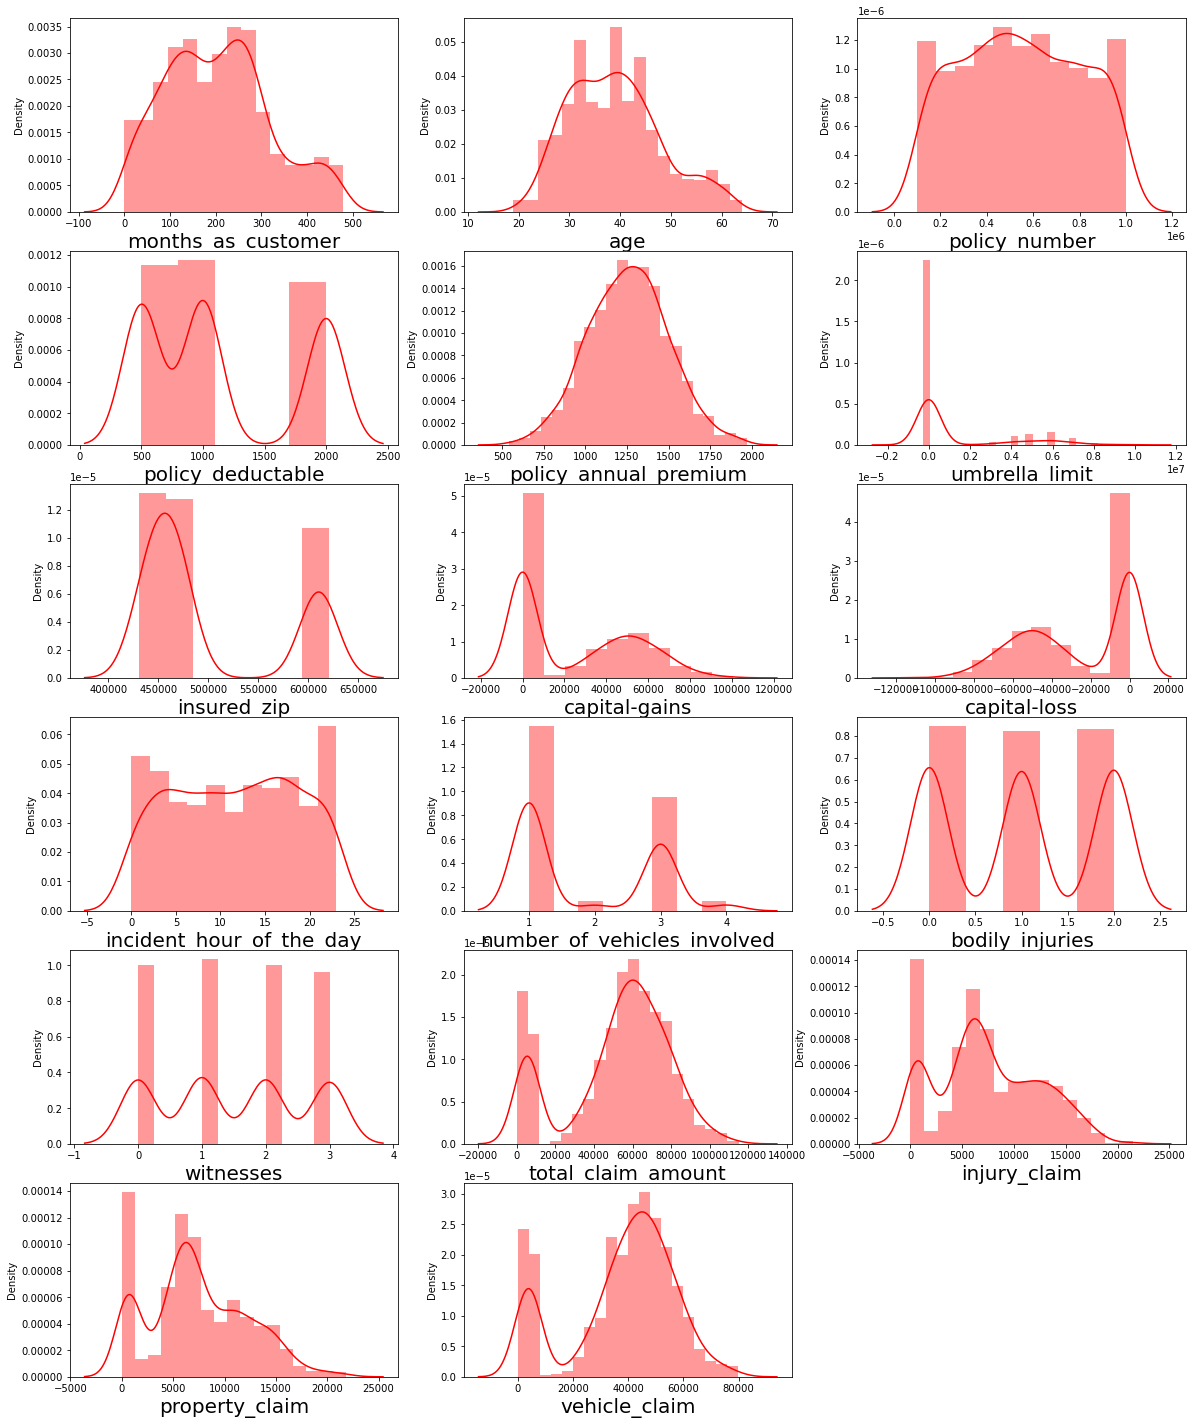

In [69]:
numerical_col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [70]:
df.skew()

months_as_customer             0.359605
age                            0.474526
policy_number                  0.033722
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                 1.800271
insured_zip                    0.825568
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_year                     -0.049276
dtype: float64

In [71]:
from sklearn.preprocessing import power_transform

df[['age','capital-gains','capital-loss','number_of_vehicles_involved','total_claim_amount','injury_claim','property_claim','vehicle_claim']]=power_transform(df[['age','capital-gains','capital-loss','number_of_vehicles_involved','total_claim_amount','injury_claim','property_claim','vehicle_claim']])
   

# Encoding:

In [72]:
 from sklearn.preprocessing import LabelEncoder

In [73]:
lab_enc=LabelEncoder()

In [74]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,477,531,2,1,1,729,1,485,...,2,2,562,258,510,545,10,1,9,1
1,212,23,255,818,1,1,2,393,5,518,...,0,0,44,46,45,38,8,12,12,1
2,123,10,669,186,2,0,2,737,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,763,0,1,2,740,6,810,...,2,1,451,245,249,521,3,34,19,1
4,212,25,283,181,0,2,1,899,6,847,...,1,1,81,70,36,66,0,31,14,0


In [75]:
df1.shape

(996, 39)

# Correlation using HEAT map:

In [76]:
# Checking the correlation between features and the target
cor = df1.corr()
cor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911262,0.058624,0.056441,-0.000303,-0.022260,0.013264,0.008378,0.015090,0.020183,...,0.062624,0.024194,0.059002,0.065689,0.033505,0.054415,0.046136,-0.000269,0.003736,0.017557
age,0.911262,1.000000,0.060945,0.058145,-0.015182,-0.012429,0.018201,0.012613,0.020280,0.016986,...,0.056658,0.017414,0.072252,0.075490,0.062057,0.059778,0.032105,0.016258,0.003268,0.012408
policy_number,0.058624,0.060945,1.000000,0.046351,0.071870,0.037989,-0.013891,0.020354,0.012700,-0.002368,...,-0.010642,0.031533,-0.009162,-0.013418,-0.004996,-0.013220,0.020538,0.062221,-0.002923,-0.035004
policy_bind_date,0.056441,0.058145,0.046351,1.000000,0.015141,0.005946,-0.014651,-0.032444,-0.023688,-0.032856,...,-0.009743,-0.037529,0.005296,0.022266,0.013157,0.005296,-0.024998,-0.000374,0.035488,0.060105
policy_state,-0.000303,-0.015182,0.071870,0.015141,1.000000,-0.000349,0.009755,0.016727,-0.032479,0.023140,...,0.024809,0.070824,-0.017997,-0.042864,0.005623,-0.009061,0.015848,-0.024513,0.002323,0.028864
policy_csl,-0.022260,-0.012429,0.037989,0.005946,-0.000349,1.000000,0.005131,0.021603,0.024119,0.003376,...,0.069261,-0.000905,-0.046531,-0.078374,-0.045427,-0.028991,-0.006565,0.048351,-0.034893,-0.038795
policy_deductable,0.013264,0.018201,-0.013891,-0.014651,0.009755,0.005131,1.000000,-0.000771,0.008328,-0.001392,...,0.077409,0.033807,0.023553,0.030251,0.062804,0.005763,-0.029083,-0.004174,0.026578,0.009108
policy_annual_premium,0.008378,0.012613,0.020354,-0.032444,0.016727,0.021603,-0.000771,1.000000,-0.005320,0.051154,...,0.015079,0.019142,-0.002264,-0.024202,-0.004602,0.006517,0.013311,-0.032368,-0.026279,-0.013206
umbrella_limit,0.015090,0.020280,0.012700,-0.023688,-0.032479,0.024119,0.008328,-0.005320,1.000000,0.010976,...,-0.003646,-0.054220,-0.035772,-0.047476,-0.018024,-0.031589,-0.007096,0.042221,0.011071,0.057875
insured_zip,0.020183,0.016986,-0.002368,-0.032856,0.023140,0.003376,-0.001392,0.051154,0.010976,1.000000,...,0.020665,-0.044590,-0.005042,-0.004192,-0.017248,-0.015556,-0.033170,0.030978,-0.031039,0.060773


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 [Text(0, 0.5, 'months_as_customer'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'policy_number'),
  Text(0, 3.5, 'policy_bind_date'),
  Text(0, 4.5, 'policy_state'),
  Text(0, 5.5, 'policy_csl'),
  Text(0, 6.5, 'policy_deductable'),
  Text(0, 7.5, 'policy_annual_premium'),
  Text(0, 8.5, 'umbrella_limit'),
  Text(0, 9.5, 'insured_zip'),
  Text(0, 10.5, 'insured_sex'),
  Text(0, 11.5, 'insured_education_level'),
  Text(0, 12.5, 'insured_occupation'),
  Text(0, 13.5, 'insured_hobbies'),
  Text(0, 14.5, 'insured_relationship'),
  Text(0, 15.5, 'capital-gains'),
  Text(0, 16.5, 'capital-loss'),
  Text(0, 17.5, 'incident_date'),
  Text(0, 18.5, 'incident_type'),
  Text(0, 19.5, 'collision_type'),
  Text(0, 20.5, 'incident_severity'

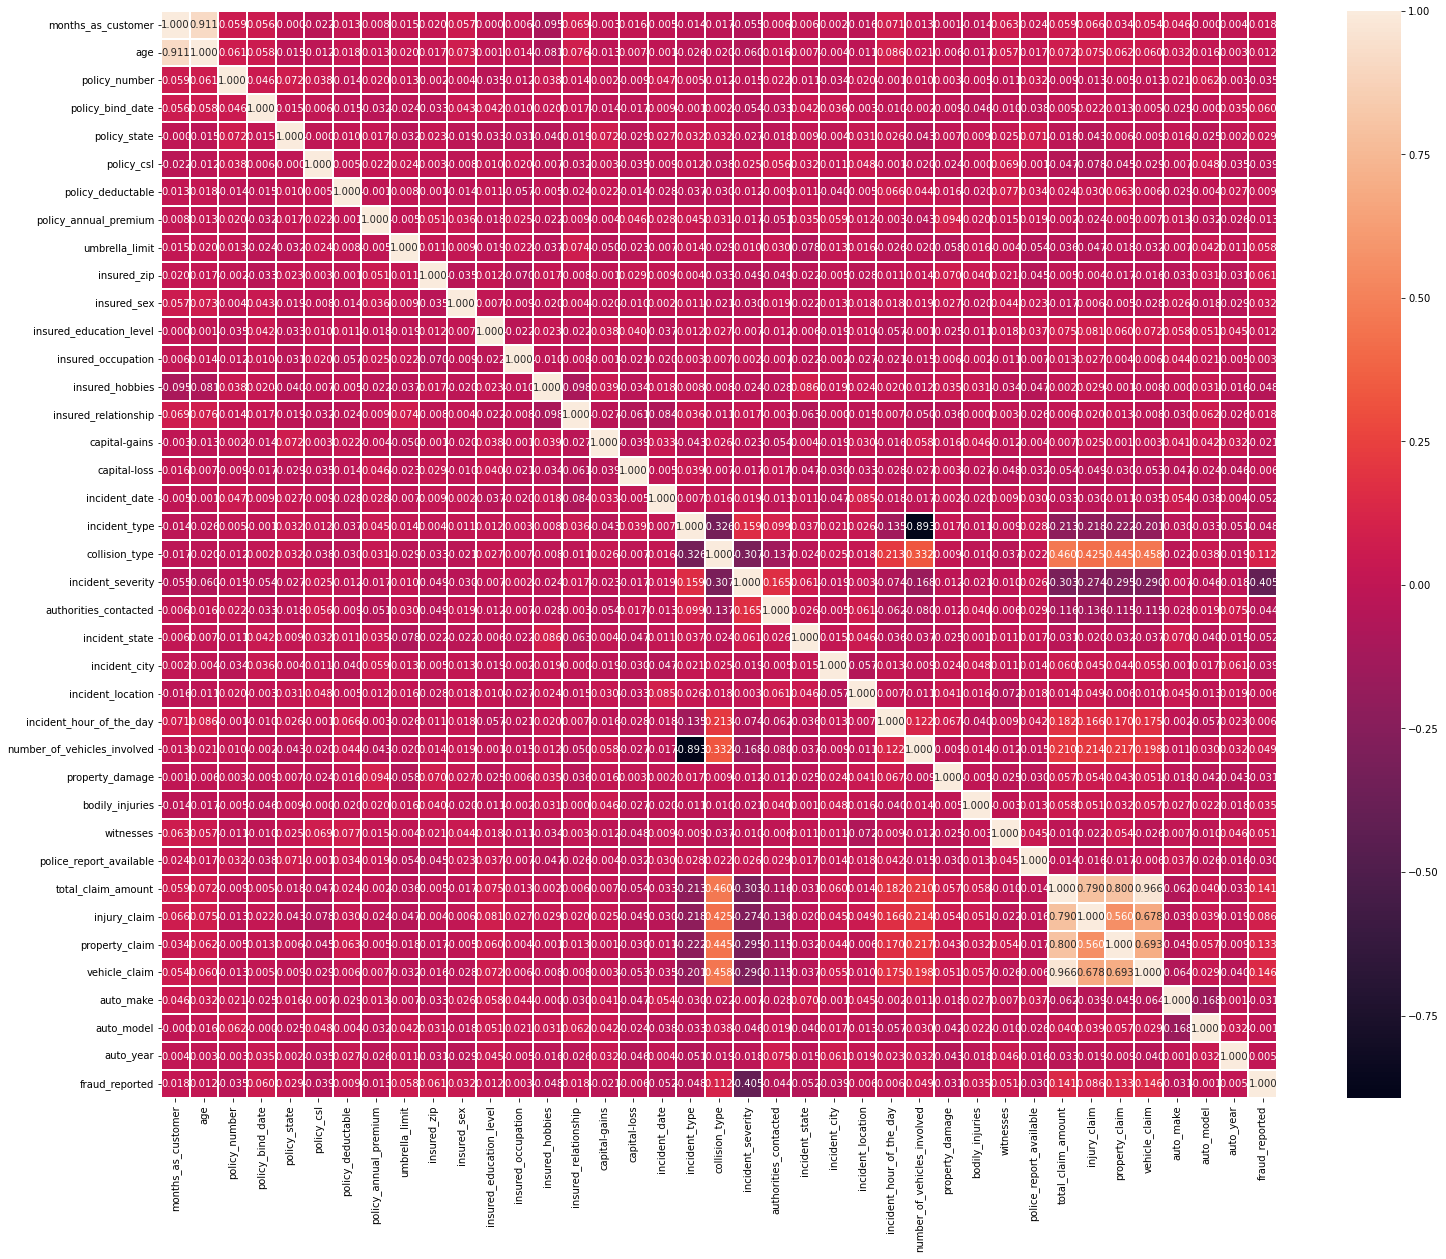

In [77]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [78]:
cor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.146141
total_claim_amount             0.141308
property_claim                 0.133287
collision_type                 0.111702
injury_claim                   0.086035
insured_zip                    0.060773
policy_bind_date               0.060105
umbrella_limit                 0.057875
witnesses                      0.051283
number_of_vehicles_involved    0.048612
bodily_injuries                0.035484
insured_sex                    0.032173
policy_state                   0.028864
insured_relationship           0.017992
months_as_customer             0.017557
age                            0.012408
insured_education_level        0.011520
policy_deductable              0.009108
incident_hour_of_the_day       0.005863
auto_year                      0.004758
insured_occupation             0.003335
auto_model                    -0.001416
incident_location             -0.005603
capital-loss                  -0.005635


# Visualizing the correlation between label and features using bar plot

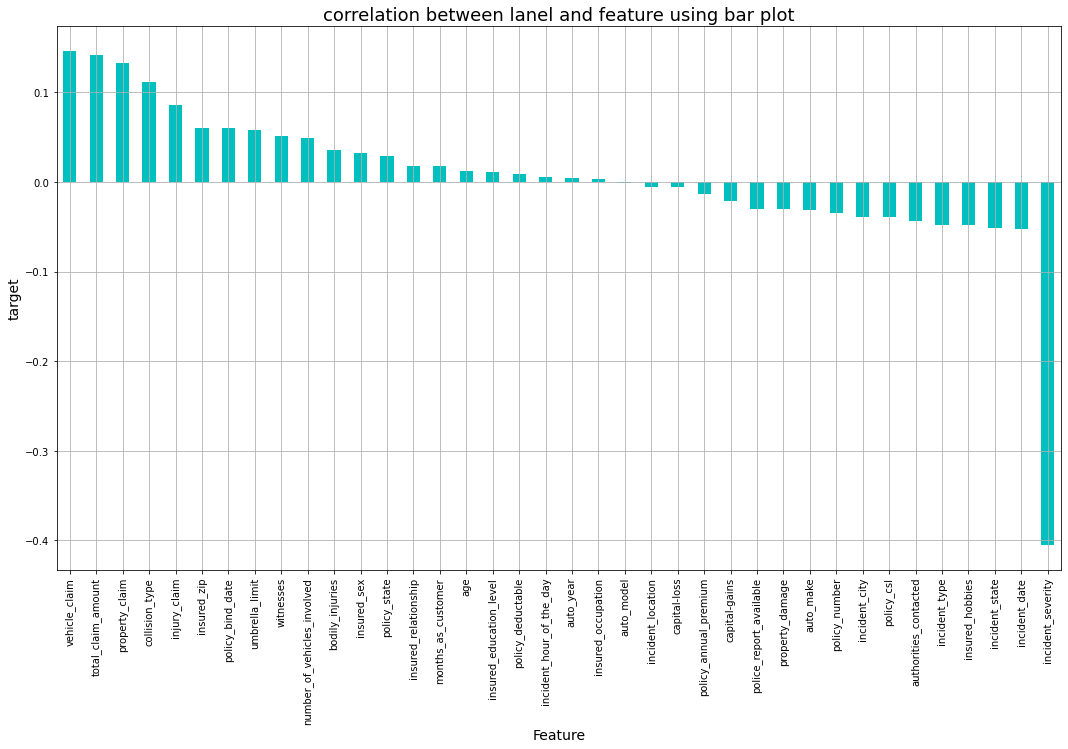

In [79]:
plt.figure(figsize=(18,10))
df1.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.grid(True)
plt.show()

In [80]:
df1.drop('auto_model',axis=1,inplace=True)

In [81]:
df1.drop('incident_location',axis=1,inplace=True)
df1.drop('insured_occupation',axis=1,inplace=True)
df1.drop('auto_year',axis=1,inplace=True)
df1.drop('incident_hour_of_the_day',axis=1,inplace=True)
df1.drop('insured_education_level',axis=1,inplace=True)

In [82]:
df1.drop('incident_severity',axis=1,inplace=True)
df1.drop('incident_date',axis=1,inplace=True)
df1.drop('insured_hobbies',axis=1,inplace=True)
df1.drop('incident_state',axis=1,inplace=True)

In [83]:
df1.shape

(996, 29)

# Dividing data in feature and Label

In [84]:
x=df1.drop(columns='fraud_reported')#Feature
y=df1.fraud_reported#Target

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smt=SMOTE()
x_sample,y_sample=smt.fit_resample(x,y)

In [87]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.14565039e+00,  9.87189953e-01, -7.12993162e-02, ...,
         1.22677215e+00,  9.48224632e-01,  8.57247950e-01],
       [ 2.73397047e-01,  3.30455325e-01, -8.43418740e-01, ...,
        -1.32893649e+00, -1.47757867e+00,  3.60985841e-01],
       [-6.18908101e-01, -1.09246970e+00,  5.96479645e-01, ...,
        -1.00466378e+00, -1.10437817e+00, -6.31538377e-01],
       ...,
       [-6.59011703e-01, -5.45190844e-01,  1.39642319e+00, ...,
         2.31969435e-01,  9.91286229e-01,  1.10537900e+00],
       [ 1.92767064e+00,  2.51957075e+00, -1.73900771e-03, ...,
        -6.41918035e-01, -4.34531099e-01, -1.37593154e+00],
       [ 1.91764473e+00,  2.30065921e+00,  7.82553470e-02, ...,
        -1.28496731e+00, -1.45844019e+00,  3.60985841e-01]])

# Now use VIF for checking multicollinearity problem
VIF - > Variance Inflation Factor

In [88]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [89]:
vif

,vif,feature
0,5.990943,months_as_customer
1,6.016600,age
2,1.020312,policy_number
3,1.023527,policy_bind_date
4,1.030853,policy_state
5,1.022382,policy_csl
6,1.026022,policy_deductable
7,1.032119,policy_annual_premium
8,1.021670,umbrella_limit
9,1.034624,insured_zip


In [90]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [91]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,months_as_customer,5.987664
1,age,6.014258
2,policy_number,1.018534
3,policy_bind_date,1.019321
4,policy_state,1.030102
5,policy_csl,1.022126
6,policy_deductable,1.025696
7,policy_annual_premium,1.032107
8,umbrella_limit,1.021196
9,insured_zip,1.023636


In [92]:
x.drop('age',axis=1,inplace=True)

In [93]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,months_as_customer,1.032436
1,policy_number,1.018203
2,policy_bind_date,1.019168
3,policy_state,1.029091
4,policy_csl,1.021668
5,policy_deductable,1.025651
6,policy_annual_premium,1.031656
7,umbrella_limit,1.021109
8,insured_zip,1.023631
9,insured_sex,1.020791


# TRAIN TEST SPLIT

In [94]:
from sklearn.model_selection import train_test_split


# MODEL BUILDING

In [95]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [96]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [97]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Radom State ",i,"The Model Performs Very Well")
        print("At random State ",i,"The Model performs very well")
        print("Training Accuracy Score is :- ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is : - ",accuracy_score(y_test,pred_test)*100,"\n")

At Radom State  7 The Model Performs Very Well
At random State  7 The Model performs very well
Training Accuracy Score is :-  75.0
Testing Accuracy Score is : -  75.0 

At Radom State  18 The Model Performs Very Well
At random State  18 The Model performs very well
Training Accuracy Score is :-  75.0
Testing Accuracy Score is : -  75.0 

At Radom State  106 The Model Performs Very Well
At random State  106 The Model performs very well
Training Accuracy Score is :-  75.0
Testing Accuracy Score is : -  75.0 

At Radom State  155 The Model Performs Very Well
At random State  155 The Model performs very well
Training Accuracy Score is :-  75.0
Testing Accuracy Score is : -  75.0 

At Radom State  221 The Model Performs Very Well
At random State  221 The Model performs very well
Training Accuracy Score is :-  75.50251256281408
Testing Accuracy Score is : -  75.5 

At Radom State  268 The Model Performs Very Well
At random State  268 The Model performs very well
Training Accuracy Score is :-

For Logistic Regression we select Random State - 221

# Lets check with KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [99]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7939698492462312
 At random state 0 , the testing accuracy is :- 0.72


 At random state 1 , the testing accuracy is :- 0.7738693467336684
 At random state 1 , the testing accuracy is :- 0.72


 At random state 2 , the testing accuracy is :- 0.792713567839196
 At random state 2 , the testing accuracy is :- 0.74


 At random state 3 , the testing accuracy is :- 0.7952261306532663
 At random state 3 , the testing accuracy is :- 0.695


 At random state 4 , the testing accuracy is :- 0.7977386934673367
 At random state 4 , the testing accuracy is :- 0.69


 At random state 5 , the testing accuracy is :- 0.8178391959798995
 At random state 5 , the testing accuracy is :- 0.65


 At random state 6 , the testing accuracy is :- 0.785175879396985
 At random state 6 , the testing accuracy is :- 0.745


 At random state 7 , the testing accuracy is :- 0.7914572864321608
 At random state 7 , the testing accuracy is :- 0.745


 At random state 8 , th

For KNN we select Random State - 10

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [101]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [102]:
knn.score(x_train,y_train)#Training Score

0.7952261306532663

In [103]:
knn.score(x_test,y_test)#Testing Score

0.755

# Lets check with AdaBoostClassifier

In [104]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [105]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    ada.fit(x_train,y_train)
    x_pred=ada.predict(x_train)
    y_pred=ada.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7814070351758794
 At random state 0 , the testing accuracy is :- 0.69


 At random state 1 , the testing accuracy is :- 0.7688442211055276
 At random state 1 , the testing accuracy is :- 0.7


 At random state 2 , the testing accuracy is :- 0.7902010050251256
 At random state 2 , the testing accuracy is :- 0.69


 At random state 3 , the testing accuracy is :- 0.7952261306532663
 At random state 3 , the testing accuracy is :- 0.72


 At random state 4 , the testing accuracy is :- 0.7939698492462312
 At random state 4 , the testing accuracy is :- 0.68


 At random state 5 , the testing accuracy is :- 0.7902010050251256
 At random state 5 , the testing accuracy is :- 0.65


 At random state 6 , the testing accuracy is :- 0.7801507537688442
 At random state 6 , the testing accuracy is :- 0.735


 At random state 7 , the testing accuracy is :- 0.7839195979899497
 At random state 7 , the testing accuracy is :- 0.72


 At random state 8 , the

For AdaBoostClassifier we select Random State - 17

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [107]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [108]:
ada.score(x_train,y_train)#Training Score

0.7839195979899497

In [109]:
ada.score(x_test,y_test)#Testing Score

0.755

# Lets check with Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [111]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.73


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.77


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.73


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.745


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.74


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.7


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.78


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.77


 At random state 8 , the testing accuracy is :- 1.0
 At random state 8 , the testing accuracy is :- 0.765


 At random state 9 , the testing acc

For RandomForest Classifier we select Random State - 17

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [113]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
rf.score(x_train,y_train)

1.0

In [115]:
rf.score(x_test,y_test)

0.795

# Do Hyperparameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

In [118]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [119]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [120]:
cnn=RandomForestClassifier(criterion='gini',max_depth=12,max_leaf_nodes=4,min_samples_split= 5)

In [121]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 13, 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [122]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_leaf_nodes=4, min_samples_split=5)

In [123]:
cnn.score(x_train,y_train)

0.7412060301507538

In [124]:
cnn.score(x_test,y_test)

0.8

# Lets Save Our Model

In [125]:
import pickle
filename='Insurance.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [126]:
loaded_model=pickle.load(open('Insurance','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

79.5


In [127]:
# batch  No - ds0522
# Data Trained